# Logistic regression, example with 'default of credit card clients'

In [2]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('default of credit card clients.csv', header=1, sep=";")

# Preprocess the dataset
# Rename the 'default payment next month' to 'default' for simplicity
df = df.rename(columns={'default payment next month': 'default'})

# Define the feature matrix X and target y
X = df.drop('default', axis=1)
y = df['default']

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Add constant to the feature matrix for the logistic regression intercept
X = sm.add_constant(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
model = sm.Logit(y_train, X_train)

# Fit the model
result = model.fit()

# Print the summary statistics of the regression model
print(result.summary())

# Predict the probabilities of default on the test set
y_pred = result.predict(X_test)

# Convert probabilities into binary outcomes
y_pred_binary = [0 if p < 0.5 else 1 for p in y_pred]

# Evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix

# Print accuracy score and confusion matrix
print('Accuracy on test data:', accuracy_score(y_test, y_pred_binary))
print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred_binary))


Optimization terminated successfully.
         Current function value: 0.465067
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                24000
Model:                          Logit   Df Residuals:                    23975
Method:                           MLE   Df Model:                           24
Date:                Mon, 03 Jul 2023   Pseudo R-squ.:                  0.1211
Time:                        23:14:40   Log-Likelihood:                -11162.
converged:                       True   LL-Null:                       -12700.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4592      0.018    -79.195      0.000      -1.495      -1.423
x1            -0.0039      0.

### Evaluate and discuss model performance with CAP Curve

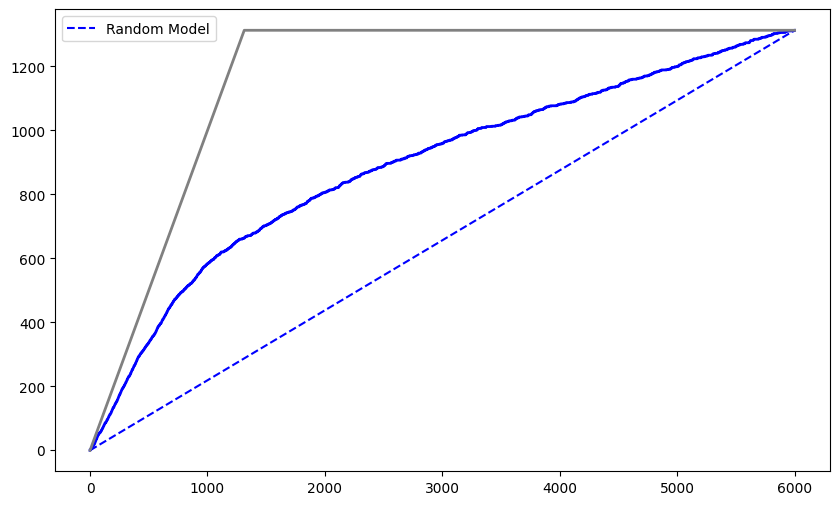

In [3]:
# code for the random plot
import matplotlib.pyplot as plt
import numpy as np
 
# length of the test data
total = len(y_test)
 
# Counting '1' labels in test data
one_count = np.sum(y_test)
 
# counting '0' labels in test data
zero_count = total - one_count
 
plt.figure(figsize = (10, 6))
 
# x-axis ranges from 0 to total people contacted
# y-axis ranges from 0 to the total positive outcomes.
 
plt.plot([0, total], [0, one_count], c = 'b',
         linestyle = '--', label = 'Random Model')
plt.legend()

lm = [y for _, y in sorted(zip(y_pred, y_test), reverse = True)]
x = np.arange(0, total + 1)
y = np.append([0], np.cumsum(lm))
plt.plot(x, y, c = 'b', label = 'Random classifier', linewidth = 2)

plt.plot([0, one_count, total], [0, one_count, one_count],
         c = 'grey', linewidth = 2, label = 'Perfect Model')


### Task: Remove unnecessary input parameters and compare results